# Task 8. Тема: 3D Фракталы [Кривая Коха](https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D0%B2%D0%B0%D1%8F_%D0%9A%D0%BE%D1%85%D0%B0).

## Введение.

Для начала немного теории. 

Кривая Коха — фрактальная кривая, описанная в 1904 году шведским математиком Хельге фон Кохом.

Кривая Коха является типичным геометрическим фракталом.
Процесс её построения выглядит следующим образом: 
берём единичный отрезок, разделяем на три равные части и 
заменяем средний интервал равносторонним треугольником без этого сегмента. 
В результате образуется ломаная, состоящая из четырёх звеньев длины 1/3. На следующем шаге 
повторяем операцию для каждого из четырёх получившихся звеньев и т. д… Предельная кривая и есть кривая Коха.

Для наглядности приведу следующие картинки.

![к сожалению изображение на загрузилось, здесь должна была быть кривая Коха](https://upload.wikimedia.org/wikipedia/commons/thumb/4/48/Koch_curve_construction.svg/800px-Koch_curve_construction.svg.png)

Также есть следующие варианты.
![к сожалению изображение на загрузилось, здесь должна была быть кривая Коха](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/KochFlake.svg/300px-KochFlake.svg.png)

Фракталы подобные кривым Коха получаеются не только с треугольниками но и с параллелепипедами, окружностями и другими фигурами

Наблюдать различные вариации фракталов возможно и изменяя углы геометрических фигур и длины сторон.

Квадратичная кривая первого типа:
![к сожалению изображение на загрузилось, здесь должна была быть кривая Коха](https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Quadratic_Koch_2.png/225px-Quadratic_Koch_2.png)


## Основные свойства кривой Коха.

1. Кривая Коха непрерывна, но нигде не дифференцируема.


2. Имеет бесконечную длину. 
    Пусть длина исходного отрезка равна 1. На каждом шаге построения мы заменяем каждый из составляющих линию отрезков на ломаную,
которая в 4/3 раза длиннее. Значит, и длина всей ломаной на каждом шаге умножается на 4/3: длина линии с номером n равна 
(4/3)n–1. Поэтому предельной линии ничего не остается, кроме как быть бесконечно длинной.


3. Снежинка Коха ограничивает конечную площадь.
    И это при том, что ее периметр бесконечен. Это свойство может показаться парадоксальным, но оно очевидно — снежинка полностью помещается в круг, поэтому ее площадь заведомо ограничена. Площадь можно посчитать, и для этого даже не нужно особых знаний — формулы площади треугольника и суммы геометрической прогрессии проходят в школе. 
    

4. Плоскость допускает замощение снежинками Коха двух размеров. При этом не существует замощения снежинками одного размера.


## Построение кривой Коха

Попробуем описать алгоритм построения кривой Коха. Я буду использовать для этих целей python и библиотеки для построения
графииков.

В случае двумерной кривой будем использовать *matplotlib*

Для математических вычислений также подключим *math*

Для начала утановим необходимые модули а после подключим необходимые библиотеки.

In [4]:
pip install matplotlib

  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
Note: you may need to restart the kernel to use updated packages.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\3С_273\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [19]:
import pylab
import matplotlib.patches
import matplotlib.lines
import matplotlib.path
import math
from numpy import *

Для кривой Коха понадобится рисовать треугольники, по этому напишим функцию для рисования треугольников. Она будет использовать 
полигоны которые уже есть в библиотеке *matplotlib*

Для начала пусть функция рисует только равносторонние треугольники. 

Рисование происходить с помощью простых тригонометрических функций.

In [7]:
def draw_triangle(axes, size, x,y):
    plots = [(x,y),(x+size*math.cos(math.pi/3),y+size*math.sin(math.pi/3)),(x+size,y)]
    polygon = matplotlib.patches.Polygon(plots, fill = False)
    axes.add_patch(polygon)

Окей, напишем код чтобы проверить нашу функцию.

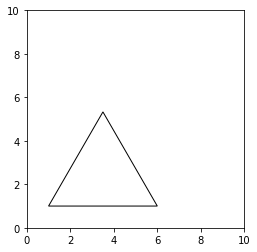

In [8]:
pylab.xlim (0,10)
pylab.ylim (0,10)
axes = pylab.gca()
axes.set_aspect("equal")
draw_triangle(axes, 5, 1, 1)
pylab.show()

Можно заметить, что код работает и изменяя последние два аргумента функции можно перемещать треугольник как вздумается.
Но для отрисовки фрактала нам потребуется не только распологать треугольник в любой точке пространства но и вращать его, по этому добавим возможность повернуть треугольник на какой-нибудь угол. Для поворота будем использовать двумерную матрицу поворота.

In [ ]:
#temp!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
import matplotlib.path
import math
from numpy import *

def draw_triangle(axes, size, x,y, angle):
    turn_mat = array([[math.cos(angle), math.sin(angle)],
    [-math.sin(angle), math.cos(angle)]])
    plots = [(x,y),(x+size*math.cos(math.pi/3),y+size*math.sin(math.pi/3)),(x+size,y)]
    plots_turn = list()
    for plot in plots:
        res = turn_mat.dot(array([[plot[0]], [plot[1]]]))
        plots_turn.append((res[0][0], res[1][0]))
    polygon = matplotlib.patches.Polygon(plots_turn, fill = False)
    axes.add_patch(polygon)

pylab.xlim (0,10)
pylab.ylim (0,10)
axes = pylab.gca()
axes.set_aspect("equal")
draw_triangle(axes, 5, 1, 1, 0.25)
pylab.show()

In [22]:
def draw_triangle(axes, size, x,y, angle):
    turn_mat = array([[math.cos(angle), math.sin(angle)],
    [-math.sin(angle), math.cos(angle)]])
    plots = [(x,y),(x+size*math.cos(math.pi/3),y+size*math.sin(math.pi/3)),(x+size,y)]
    plots_turn = list()
    for plot in plots:
        res = turn_mat.dot(array([[plot[0]], [plot[1]]]))
        plots_turn.append((res[0][0], res[1][0]))
    polygon = matplotlib.patches.Polygon(plots_turn, fill = False)
    axes.add_patch(polygon)

In [ ]:
def fractal(axes, depth, size):
    if depth == 0:
        return

In [ ]:
Теперь, имея средство рисования треугольников, можем перейти к коду который описывает рекурсивную функцию которая будет 
рисовать фракталы.

In [1]:
pip install openpyscad

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Users\3С_273\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
